<b>pandas</b> untuk membantu manipulasi <i>data frame</i><br>
<b>seaborn</b> untuk visualisasi data

In [1]:
import pandas as pd
import seaborn as sns

### 1. Muat <i>dataset</i>

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Rakhid16/Naive-Bayes/master/Paper%201/bersih.csv?token=AVQaI8gDdmd2Js-bg7bYN6pVWNjJVEJxks5csrfawA%3D%3D", index_col=0)
data

,Age,Gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,6,1,1,4,2,1,2,5,0,3,3,0,6,0
1,7,1,4,5,3,0,2,2,1,2,2,3,3,2
2,7,1,4,2,2,0,2,4,1,4,2,2,7,1
3,1,1,3,3,2,0,0,8,0,5,3,0,3,0
4,2,0,2,3,1,0,2,6,0,2,1,0,3,0
5,5,1,2,2,2,0,0,7,0,1,1,0,3,0
6,6,0,4,4,2,0,2,6,0,5,3,2,3,3
7,5,0,4,2,4,0,0,6,1,0,1,0,3,0
8,6,1,4,3,2,0,2,5,0,2,2,1,7,2
9,4,1,4,4,1,1,2,5,1,4,3,0,7,1


Pada tahap pembuatan model ini kami sudah tidak memanipulasi <i>data frame</i>'nya sama sekali. <i>Dataset</i> yang kami gunakan merupakan data hasil praproses dari <a href="https://github.com/Rakhid16/Naive-Bayes/blob/master/Paper 1/2.%20Praproses.ipynb">tahap sebelum</a>nya. Oleh karena itu pada tahap pembuatan model ini kami hanya memfokuskan bagaimana membangun model pembelajaran mesin dari <i>dataset</i> tersebut dengan algoritma Naive Bayes.

### 2. Pemodelan

Jika belum mengetahui betul bagaimana cara kerja algoritma pembelajaran mesin Naive Bayes kami sarankan untuk membacanya terlebih dahulu di <a href="https://github.com/Rakhid16/Naive-Bayes/blob/master/Classification-Naive-Bayes-2015.pdf">sini</a>. Kalo udah tau, kuy langsung kita bikin modelnya.

Proses pembuatan model :

In [3]:
model = []
for i in range(len(data.columns)-1):
    model.append([])
    ikr = 0
    for j in sorted(data[data.columns[i]].unique()):
        model[i].append([])
        model[i][ikr].append(len(data[data[data.columns[i]]==j][data[data[data.columns[i]]==j]['num'] == 0]))
        model[i][ikr].append(len(data[data[data.columns[i]]==j][data[data[data.columns[i]]==j]['num'] == 1]))
        model[i][ikr].append(len(data[data[data.columns[i]]==j][data[data[data.columns[i]]==j]['num'] == 2]))
        model[i][ikr].append(len(data[data[data.columns[i]]==j][data[data[data.columns[i]]==j]['num'] == 3]))
        model[i][ikr].append(len(data[data[data.columns[i]]==j][data[data[data.columns[i]]==j]['num'] == 4]))
        ikr += 1
model

[[[1, 0, 0, 0, 0],
  [7, 2, 0, 0, 1],
  [25, 3, 2, 3, 0],
  [25, 7, 3, 3, 0],
  [31, 6, 2, 5, 1],
  [32, 15, 8, 12, 4],
  [16, 15, 14, 6, 3],
  [19, 6, 6, 5, 2],
  [6, 1, 1, 1, 1],
  [2, 0, 0, 0, 1]],
 [[72, 9, 7, 7, 2], [92, 46, 29, 28, 11]],
 [[16, 5, 1, 0, 1], [41, 6, 1, 2, 0], [68, 9, 4, 4, 1], [39, 35, 30, 29, 11]],
 [[11, 0, 1, 1, 0],
  [21, 9, 4, 3, 2],
  [44, 17, 7, 12, 2],
  [44, 8, 11, 6, 2],
  [31, 12, 8, 7, 5],
  [9, 6, 2, 2, 1],
  [2, 2, 2, 1, 1],
  [2, 0, 1, 2, 0],
  [0, 1, 0, 0, 0],
  [0, 0, 0, 1, 0]],
 [[6, 2, 1, 3, 1],
  [54, 11, 8, 9, 3],
  [64, 24, 13, 9, 4],
  [29, 15, 9, 11, 3],
  [8, 3, 4, 3, 1],
  [1, 0, 1, 0, 1],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0]],
 [[141, 51, 27, 27, 12], [23, 4, 9, 8, 1]],
 [[95, 23, 19, 12, 2], [1, 0, 1, 1, 1], [68, 32, 16, 22, 10]],
 [[0, 0, 1, 0, 0],
  [1, 2, 1, 3, 0],
  [3, 5, 4, 6, 1],
  [11, 4, 5, 7, 4],
  [17, 11, 11, 7, 3],
  [37, 12, 10, 6, 2],
  [57, 15, 4, 5, 2],
  [32, 5, 0, 1, 1],
  [5, 1, 0, 0, 0],
  [1, 0, 0, 0, 0]],
 [[141, 

Itu maksudnya seperti ini :<br><br>
![alt text](https://raw.githubusercontent.com/Rakhid16/Naive-Bayes/master/Paper%201/sebelum%20laplace.png?token=AVQaI6-uLnJdXReTNb8dclrDtGG9KA3-ks5cssAJwA%3D%3D)<br><br>
Tunggu dulu Ferguso ada yang aneh, coba lihat kolom <b>chol</b> sama <b>oldpeak</b>.<br>
Jumlah kelas/kategori pada kolom tersebut kurang dari 10.

Nah mari kita perhatikan sebaran data dari visualisasi di bawah

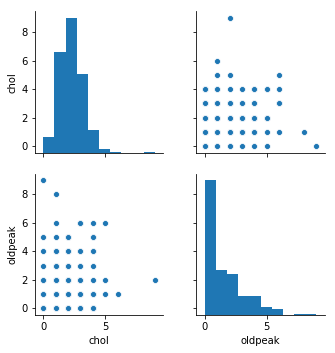

In [4]:
sns.pairplot(data=data[['chol', 'oldpeak']])

Pada masing-masing gambar terdapat data yang jaraknya terpisah dari yang lain(kanan-bawah atau kiri-atas pada tiap gambar). Ini adalah sebab mengapa kelas/kategori pada kolom <b>chol</b> dan <b>oldpeak</b> lurang dari 10.<br>
Di <i>dataset</i> memang datanya seperti itu. Tidak ada data yang masuk ke dalam kategori 7 dan 8 pada kolom <b>chol</b> juga tidak ada data yang masuk ke dalam kaetgori 7 pada kolom <b>oldpeak</b>. Solusinya adalah dengan menambahkan kelas yang tidak ada ke dalam masing-masing kolom dengan data kosong/0 pada model yang telah kita buat.

In [5]:
model[4][7:-1] = [0,0,0,0,0],[0,0,0,0,0]   # kolom chol
model[9][7:-2] = [[0,0,0,0,0]]             # kolom oldpeak
model

[[[1, 0, 0, 0, 0],
  [7, 2, 0, 0, 1],
  [25, 3, 2, 3, 0],
  [25, 7, 3, 3, 0],
  [31, 6, 2, 5, 1],
  [32, 15, 8, 12, 4],
  [16, 15, 14, 6, 3],
  [19, 6, 6, 5, 2],
  [6, 1, 1, 1, 1],
  [2, 0, 0, 0, 1]],
 [[72, 9, 7, 7, 2], [92, 46, 29, 28, 11]],
 [[16, 5, 1, 0, 1], [41, 6, 1, 2, 0], [68, 9, 4, 4, 1], [39, 35, 30, 29, 11]],
 [[11, 0, 1, 1, 0],
  [21, 9, 4, 3, 2],
  [44, 17, 7, 12, 2],
  [44, 8, 11, 6, 2],
  [31, 12, 8, 7, 5],
  [9, 6, 2, 2, 1],
  [2, 2, 2, 1, 1],
  [2, 0, 1, 2, 0],
  [0, 1, 0, 0, 0],
  [0, 0, 0, 1, 0]],
 [[6, 2, 1, 3, 1],
  [54, 11, 8, 9, 3],
  [64, 24, 13, 9, 4],
  [29, 15, 9, 11, 3],
  [8, 3, 4, 3, 1],
  [1, 0, 1, 0, 1],
  [1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0]],
 [[141, 51, 27, 27, 12], [23, 4, 9, 8, 1]],
 [[95, 23, 19, 12, 2], [1, 0, 1, 1, 1], [68, 32, 16, 22, 10]],
 [[0, 0, 1, 0, 0],
  [1, 2, 1, 3, 0],
  [3, 5, 4, 6, 1],
  [11, 4, 5, 7, 4],
  [17, 11, 11, 7, 3],
  [37, 12, 10, 6, 2],
  [57, 15, 4, 5, 2],
  [32, 5, 0, 1, 1],
  [5, 1, 

Jadinya komplit deh ehehe...<br>
Pemodelan benar jika seluruh jumlah data pada baris total(berwarna biru) memiliki jumlah sebaran yang sama.

![alt text](https://raw.githubusercontent.com/Rakhid16/Naive-Bayes/master/Paper%201/sebelum%20laplace%202.png?token=AVQaI1UbmOkWdbjYXXC1ndhoi7AMpzjNks5cssAMwA%3D%3D)

Berhubung ada nilai 0 pada model yang telah kita buat, agar menghasilkan <i>output</i> yang akurasinya tinggi ada baiknya kita pake <a href="https://github.com/Rakhid16/Naive-Bayes/blob/master/Classification-Naive-Bayes-2015.pdf">Laplace Estimator</a>.<br><a href="https://github.com/Rakhid16/Naive-Bayes/blob/master/Classification-Naive-Bayes-2015.pdf">Laplace Estimator</a> juga dapat berfungsi untuk membuat sebuah <i>output</i> dapat terklasifikasi.

Penggunaan <i>Laplace Estimator</i> :

In [6]:
for k in range(len(data.columns)-1):
    for l in range(len(model[k])):
        model[k][l] = [n+1 for n in model[k][l]]
model

[[[2, 1, 1, 1, 1],
  [8, 3, 1, 1, 2],
  [26, 4, 3, 4, 1],
  [26, 8, 4, 4, 1],
  [32, 7, 3, 6, 2],
  [33, 16, 9, 13, 5],
  [17, 16, 15, 7, 4],
  [20, 7, 7, 6, 3],
  [7, 2, 2, 2, 2],
  [3, 1, 1, 1, 2]],
 [[73, 10, 8, 8, 3], [93, 47, 30, 29, 12]],
 [[17, 6, 2, 1, 2], [42, 7, 2, 3, 1], [69, 10, 5, 5, 2], [40, 36, 31, 30, 12]],
 [[12, 1, 2, 2, 1],
  [22, 10, 5, 4, 3],
  [45, 18, 8, 13, 3],
  [45, 9, 12, 7, 3],
  [32, 13, 9, 8, 6],
  [10, 7, 3, 3, 2],
  [3, 3, 3, 2, 2],
  [3, 1, 2, 3, 1],
  [1, 2, 1, 1, 1],
  [1, 1, 1, 2, 1]],
 [[7, 3, 2, 4, 2],
  [55, 12, 9, 10, 4],
  [65, 25, 14, 10, 5],
  [30, 16, 10, 12, 4],
  [9, 4, 5, 4, 2],
  [2, 1, 2, 1, 2],
  [2, 1, 1, 1, 1],
  [1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1],
  [2, 1, 1, 1, 1]],
 [[142, 52, 28, 28, 13], [24, 5, 10, 9, 2]],
 [[96, 24, 20, 13, 3], [2, 1, 2, 2, 2], [69, 33, 17, 23, 11]],
 [[1, 1, 2, 1, 1],
  [2, 3, 2, 4, 1],
  [4, 6, 5, 7, 2],
  [12, 5, 6, 8, 5],
  [18, 12, 12, 8, 4],
  [38, 13, 11, 7, 3],
  [58, 16, 5, 6, 3],
  [33, 6, 1, 2, 2],
 

Jadinya seperti ini :<br><br>
![alt text](https://raw.githubusercontent.com/Rakhid16/Naive-Bayes/master/Paper%201/sesudah%20laplace.png?token=AVQaI6H_4IXD72ftYirMYg3m_UbPv9J4ks5cssAMwA%3D%3D)<br><br>
Selanjutnya kita ubah ke dalam bentuk rasio(antara 0 sampai 1)

Pengubahan ke rasio :

In [7]:
for m in range(len(data.columns)-1):
    for n in range(len(model[m])):
        model[m][n] = [x/sum(model[m][n]) for x in model[m][n]]
model

[[[0.3333333333333333,
   0.16666666666666666,
   0.16666666666666666,
   0.16666666666666666,
   0.16666666666666666],
  [0.5333333333333333,
   0.2,
   0.06666666666666667,
   0.06666666666666667,
   0.13333333333333333],
  [0.6842105263157895,
   0.10526315789473684,
   0.07894736842105263,
   0.10526315789473684,
   0.02631578947368421],
  [0.6046511627906976,
   0.18604651162790697,
   0.09302325581395349,
   0.09302325581395349,
   0.023255813953488372],
  [0.64, 0.14, 0.06, 0.12, 0.04],
  [0.4342105263157895,
   0.21052631578947367,
   0.11842105263157894,
   0.17105263157894737,
   0.06578947368421052],
  [0.288135593220339,
   0.2711864406779661,
   0.2542372881355932,
   0.11864406779661017,
   0.06779661016949153],
  [0.46511627906976744,
   0.16279069767441862,
   0.16279069767441862,
   0.13953488372093023,
   0.06976744186046512],
  [0.4666666666666667,
   0.13333333333333333,
   0.13333333333333333,
   0.13333333333333333,
   0.13333333333333333],
  [0.375, 0.125, 0.125,

Udah jadi deh model kita (:<br>
Ndak perlu dikasih ilustrasi kayak tiga gambar sebelumnya kan?<br>
Intinya itu sama aja sih cuman beda nilai <i>*jelaslah!1!1!</i><br>
Langsung aja ya kita coba model kita

### 3 Menguji model

Fungsi untuk menghitung probabilitas Naive Bayes :

In [8]:
def hitung(a,b,c,d,e,f,g,h,i,j,k,l,m):
    for n in range(len(data["num"].unique())):
        nilai_prob[n] = model[0][a][n]*model[1][b][n]*model[2][c][n]*model[3][d][n]*model[4][e][n]*model[5][f][n]*model[6][g][n]*model[7][h][n]*model[8][i][n]*model[9][j][n]*model[10][k][n]*model[11][l][n]*model[12][m][n]*(len(data[data["num"]==n])/len(data))
        
    for i in range(len(nilai_prob)):
        nilai_prob[i]=nilai_prob[i]/sum(nilai_prob.values())

Data uji :

In [9]:
nama = "Rajit"
Age = 9
Gender = 0
cp = 1
trestbps = 8
chol = 7
fbs = 1
restecg = 1
thalach = 0
exang = 1
oldpeak = 7
slope = 3
ca = 3
thal = 6

Penyesuaian nilai <i>input</i> :

In [10]:
cp = cp-1
slope = slope-1

if (thal == 3):
    thal = 0
elif (thal == 6):
    thal = 1
else:
    thal = 2

Hasil akhir :

In [11]:
nilai_prob = {}
hitung(Age, Gender, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)

for key, value in nilai_prob.items():
    if (value == max(nilai_prob.values()) and key==0):
        print(nama,"tidak memiliki resiko untuk terkena penyakit jantung")
    elif (value == max(nilai_prob.values()) and key==1):
        print(nama,"beresiko rendah terkena penyakit jantung")
    elif (value == max(nilai_prob.values()) and key==2):
        print(nama,"resiko terkena penyakit jantungnya adalah sedang, tolong jaga kesehatan")
    elif (value == max(nilai_prob.values()) and key==3):
        print(nama,"beresiko tinggi terkena penyakit jantung")
    elif (value == max(nilai_prob.values()) and key==4):
        print(nama,"terdiagnosa memiliki penyakit jantung")

Rajit tidak memiliki resiko untuk terkena penyakit jantung


In [12]:
nilai_prob

{0: 0.9993691707224873,
 1: 9.453273077209618e-12,
 2: 1.7029112899924358e-11,
 3: 1.9990697752084893e-12,
 4: 5.41414730785632e-14}

### 4 Kesimpulan
Algoritma Naive Bayes merupakan algoritma pembelajaran mesin terarah yang modelnya berdasarkan probabilitas jumlah kelas pada tiap kolom/variabel. Algoritma ini sering digunakan untul pengelompokan teks pada analisis sentimen. Keunggulan algoritma ini adalah mudah dipelajari & digunakan. Pada kasus/<i>dataset</i> kami, algoritma Naive Bayes tidak berjalan dengan baik hal ini dikarenakan pada variabel/kolom yang kelasnya ingin diprediksi, jumlahnya datanya berat sebelah/tidak tersebar merata.

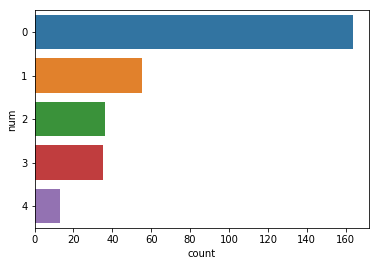

In [13]:
sns.countplot(y=data.num)

Dapat kita lihat melalui visualisasi di atas. Kelas 0 memiliki jumlah data paling banyak di antara kelas-kelas lainnya. Hal ini tentu akan mempengaruhi hasil pengujian model. Kami telah mencoba banyak sampel uji yang kami ujikan pada fase pengujian model. Namun hasilnya sama semua, yakni semua data yang kami masukkan tergolong kelas 0 yang artinya tidak memiliki resiko untuk terkena penyakit jantung.